# Project: Titanic - Machine Learning from Disaster

## I. Import libraries


In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

## II. Load Dataset

In [2]:
titanic_train = pd.read_csv("titanic/train.csv")
display(titanic_train.columns)
titanic_test = pd.read_csv("titanic/test.csv")
display(titanic_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

ONEHOT (TRƯỜNG)

In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# hiển thị giá trị thiếu
has_nan  = titanic_train.isna().sum().any()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_nan}')
if has_nan:
    display(transient=[titanic_train.isnull().any(axis=1)])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: True


In [5]:
# 1. Tạo điều kiện: True cho những dòng có Embarked bị thiếu
mask_missing_embarked = titanic_train['Embarked'].isna()

# 2. Lọc ra các dòng đó
rows_missing_embarked = titanic_train[mask_missing_embarked]

# 3. In / hiển thị kết quả
display(rows_missing_embarked)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
# Xóa mọi dòng mà cột 'Embarked' bị NaN
titanic_train = titanic_train.dropna(subset=['Embarked']).reset_index(drop=True)
# hiển thị sau khi xóa giá trị thiếu
display(titanic_train['Embarked'].isna().sum())

0

In [7]:
titanic_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [8]:
from sklearn.preprocessing import OneHotEncoder
# Khoi tao OneHotEncoder tuong thich nhieu phien ban sklearn
try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sklearn >= 1.2
except TypeError:
    ohe = OneHotEncoder(handle_unknown='ignore',sparse=False) # sklearn < 1.2

In [9]:
# Ap dung OneHotEncoder cho cot 'Embarked' 
embarked_ohe = ohe.fit_transform(titanic_train[['Embarked']])
# Lấy tên các cột mới được tạo ra bởi OneHotEncoder
ohe_cols = ohe.get_feature_names_out(['Embarked'])


In [10]:
# Tạo DataFrame từ mảng numpy kết quả OneHotEncoder
df_embarked_ohe = pd.DataFrame(
    embarked_ohe, 
    columns=ohe_cols,
    index=titanic_train.index)
# Chuyển đổi kiểu dữ liệu DataFrame sang int
df_embarked_ohe = df_embarked_ohe.astype(int)

In [11]:
# Kết hợp DataFrame gốc với DataFrame mã hóa OneHotEncoder
df_result = pd.concat([titanic_train[['Embarked']], df_embarked_ohe], axis=1)
# Hiển thị 10 dòng đầu tiên của DataFrame kết quả
print(df_result.head(10))

  Embarked  Embarked_C  Embarked_Q  Embarked_S
0        S           0           0           1
1        C           1           0           0
2        S           0           0           1
3        S           0           0           1
4        S           0           0           1
5        Q           0           1           0
6        S           0           0           1
7        S           0           0           1
8        S           0           0           1
9        C           1           0           0


#ONEHOT

**Nhận xét:**
- Các cột trong dataset của train và test là giống nhau. Tuy nhiên với train sẽ có cột $Outcome$ là $Survired$ để thể hiện số người sống sót (0: mất, 1: sống), còn test thì sẽ không có vì đây là data để thực hiện dự đoán sống sót giữa vào các features.
- Ý nghĩa của từng cột có trong dataset:


<div align="center">

| Variable | Definition |
|:---:|:---:|
| **Survival** | Survival |
| **Pclass** | Loại vé |
| **Sex** | Giới tính |
| **Age** | Tuổi |
| **Sibsp** | Tổng số anh chị em và vợ/chồng |
| **Parch** | Tổng số bố mẹ và con |
| **Ticket** | Số vé |
| **Fare** | Giá vé |
| **Cabin** | Số cabin |
| **Embarked** | Cảng |

</div>

- Trong đó:
    - Survival: 0 (mất), 1 (sống)
    - PClass: 1 (hạng nhất), 2 (hạng nhì), 3(hạng phổ thông)
    - Embarked: C (Cherbourg), Q (Queenstown), S (Southampton)

In [12]:
titanic_train.head() #show data in data train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Nhận xét:**
- Trong các cột ở train thì có cột PassengerId đây là cột số thứ tự hành khách tham gia trong chuyến tàu, trong thực tế cột này không có tác dụng trong quá trình build model. 
- Cột này sẽ được thay thế cho vị trí index sẽ hợp lý nhất.

In [13]:
titanic_train.set_index(titanic_train["PassengerId"], inplace= True) # inplace: Trực tiếp trong data
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Nhận xét:**
- Khi thực hiện set_index thì cột PassengerId đã trở thành Index, tuy nhiên cột PassengerId vẫn còn trong data, để giải quyết việc này ta sẽ drop cột đó.

In [14]:
titanic_train.drop("PassengerId", axis = 1, inplace= True) # axis = 1: xét theo chiều ngang (đi qua các cột)
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Nhận xét:**
- Khi thực hiện drop xong thì ta đã có một dataset về train hoàn thiện về cột. Tuy nhiên cách làm này thực hiện nhiều thao tác, để giải quyết vấn đề này thì ta có cách sau đây

In [15]:
titanic_test = pd.read_csv("titanic/test.csv", index_col= "PassengerId")
titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Nhận xét:**
- Thực hiện parameter index_col khi đọc dữ liệu vào, và kết quả vẫn giống như dùng cách trên nhưng ngắn gọn hơn. 

## III. Descriptive Statistics (thống kê mô tả)

### (1) **Hiển thị một số thông tin về dữ liệu**

#### 1.1 Số cột và dòng (shape)

In [16]:
titanic_train.shape

(889, 11)

**Nhận xét:**
- Dữ liệu có 891 dòng và gồm 11 cột

#### 1.2 Thông tin dữ liệu

In [17]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Cabin     202 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.3+ KB


**Nhận xét:**
- Có các cột bị missing values (thiếu dữ liệu) như: Age, Cabin. Các cột này cần kiểm tra lý do mất dữ liệu.

#### 1.3 Kiểu dữ liệu (Dtype)

In [18]:
titanic_train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

**Nhận xét:**
- Các cột này Dtype (kiểu dữ liệu) chưa chính xác với các cột cần kiểm tra lại và chỉnh sửa (nếu có).

In [19]:
# check unique của các cột trong data train
print("Survived:")
display(titanic_train["Survived"].unique())
print("Pclass:")
display(titanic_train["Pclass"].unique())
print("SibSp:")
display(titanic_train["SibSp"].unique())
print("Parch:")
display(titanic_train["Parch"].unique())
print("Cabin:")
display(titanic_train["Cabin"].unique())
print("Embarked:")
display(titanic_train["Embarked"].unique())

Survived:


array([0, 1], dtype=int64)

Pclass:


array([3, 1, 2], dtype=int64)

SibSp:


array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

Parch:


array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

Cabin:


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24',

Embarked:


array(['S', 'C', 'Q'], dtype=object)

**Nhận xét:**
- Dựa vào các giá trị có trong các cột trên thì các cột $Survived$, $Pclass$, $SibSp$, $Parch$ và $Embarked$ là các cột có giá trị phân loại (categorical) không phải giá trị số (numerical) hoặc giá trị object cần chuyển đổi kiểu dữ liệu của các cột này.

In [20]:
categorys_train = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"] # Liệt kê các cột cần chuyển
categorys_test = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"] # Liệt kê các cột cần chuyển, do test không có cột Survived

# define train
def convert_cate_train(df, categorys_train): # tạo hàm có tham số df (dataframe) và categorys là các cột cần chuyển
    for category in categorys_train: # tạo biến catergory và duyệt qua toàn bộ cột có trong categorys 
        df[category] = df[category].astype("category") # các cột cần chuyển sẽ chuyển đổi bằng astype("datatype")
# define test
def convert_cate_test(df, categorys_test): # y như train chỉ khác cột cần chuyển
    for category in categorys_test: 
        df[category] = df[category].astype("category") 

convert_cate_train(titanic_train, categorys_train) # thực hiện gọi hàm và thay thế các parameter
convert_cate_test(titanic_test, categorys_test) 

# show
display(titanic_train.info())
display(titanic_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    category
 1   Pclass    889 non-null    category
 2   Name      889 non-null    object  
 3   Sex       889 non-null    category
 4   Age       712 non-null    float64 
 5   SibSp     889 non-null    category
 6   Parch     889 non-null    category
 7   Ticket    889 non-null    object  
 8   Fare      889 non-null    float64 
 9   Cabin     202 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


None

**Nhận xét:**
- Sau khi thực hiện chuyển đổi kiểu dữ liệu của data train và test thì bây giờ kiểu dữ liệu đã đúng cho 2 dataset này.  

#### 1.4 Describe (mô tả thống kê dữ liệu)

1) Numerical data

In [21]:
titanic_train.describe()

,Age,Fare
count,712.000000,889.000000
mean,29.642093,32.096681
std,14.492933,49.697504
min,0.420000,0.000000
25%,20.000000,7.895800
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


**Nhận xét:**
- Đối với Age: 
    - Độ tuổi nhỏ nhất là 4 tháng tuổi và lớn nhất là 80 tuổi, cùng với đó thì độ tuổi trung bình là 30 tuổi
- Đối với Fare:
    - Dựa vào giá trị min max và mean thì dữ liệu của cột này rời rạc.

2) Categorical data

In [22]:
titanic_train.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,889,889,889,889,889,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,606,676,644


**Nhận xét:**
- Đối với Survived: 
    - Bao gồm 0 và 1 đại diện cho mất và sống, tuy nhiên số lượng người mất là cao nhất có tới 549 thiệt mạng
- Đối với Pclass:
    - Hạng vé 3 cao nhất với 491 người, dễ hiểu khi số lượng vé 1 và 2 thường chiếm thiểu số.
- Đối với SibSp:
    - Có tới 608 khách không đi cùng anh chị em hoặc vợ chồng
- Đối với Parch:
    - giống như SibSp có tới 678 các hành khách không đi cùng cha mẹ hoặc con cái của họ.
- Đối với Embarked:
    - Số lượng khách hàng của cảng S chiếm đa số (644)

In [23]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    category
 1   Pclass    889 non-null    category
 2   Name      889 non-null    object  
 3   Sex       889 non-null    category
 4   Age       712 non-null    float64 
 5   SibSp     889 non-null    category
 6   Parch     889 non-null    category
 7   Ticket    889 non-null    object  
 8   Fare      889 non-null    float64 
 9   Cabin     202 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.1+ KB


## IV. EDA (Exploratory Data Analysis)

**Câu hỏi:**
1. Số lượng người sống và mất là bao nhiêu, % của số lượng đó? 
2. Số lượng hành khách nam và nữ là bao nhiêu và % sống sót của họ?
3. Mối tương quan giữa các category với target

### 1. Số lượng người sống và mất là bao nhiêu, % của số lượng đó? 

,count
Survived,
0,549
1,340


,proportion
Survived,
0,0.617548
1,0.382452


<Axes: xlabel='Survived', ylabel='count'>

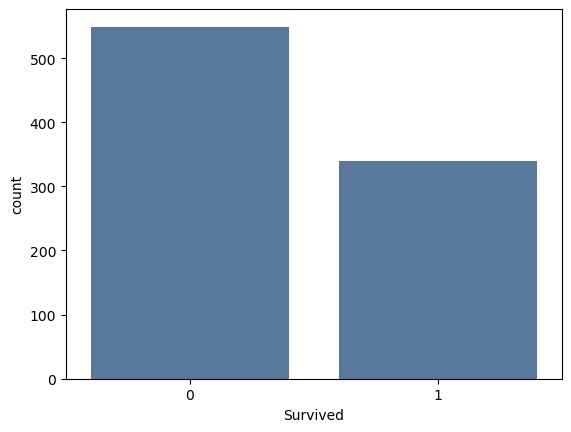

In [24]:
display(titanic_train["Survived"].value_counts().to_frame()) # value_counts đếm các giá trị khác nhau / to_frame để convert DF cho dễ nhìn
display(titanic_train["Survived"].value_counts(normalize= True).to_frame()) # normalize để tính %, default normalize = False
sns.countplot(data=titanic_train, x="Survived", color="#4C78A8") #basic
#sns.countplot(data=titanic_train, x="Survived", order=["0", "1"], palette={"0": "#E45756", "1": "#72B7B2"}) #order là giá trị trong cột và palette là distionary để chuyển màua

**Nhận xét:**
- Nhìn vào tỷ lệ sống và mất chênh lệch rõ khi số người sống sót chỉ có ~38%.

### 2. Số lượng hành khách nam và nữ là bao nhiêu và % sống sót của họ?

,count
Sex,
male,577
female,312


,proportion
Sex,
male,0.649044
female,0.350956


<Axes: xlabel='Sex', ylabel='count'>

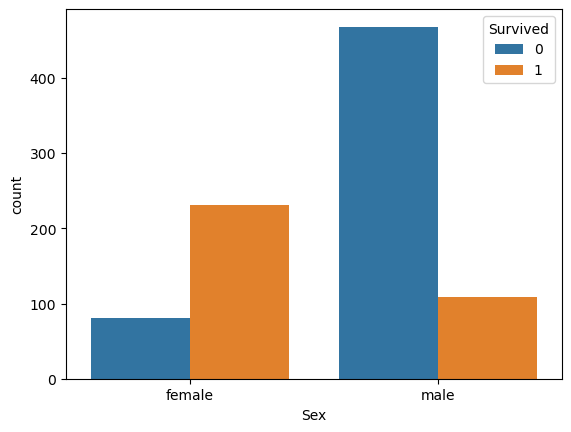

In [25]:
display(titanic_train["Sex"].value_counts().to_frame())
display(titanic_train["Sex"].value_counts(normalize= True).to_frame())
sns.countplot(data=titanic_train, x= "Sex", hue= "Survived") #hue giúp phân 2 nhóm giới tính so với từng nhóm trong Survived 


**Nhận xét:**
- Dựa vào biểu đồ trên ta có tới ~62% mất và số lượng người trên tàu có giới tính Nam cao gấp đôi giới tính Nữ. 
- Theo thông tin đó dễ hiểu với biểu đồ này khi số lượng Nam giới tỷ lệ sống sót rất thấp so với Nữ giới.
- Ngoài ra, trong lúc sự cố thì ưu tiên phụ nữ và trẻ em cho nên tỷ lệ sống sót cao hơn nam giới.

### 3. Mối tương quan giữa các category với target

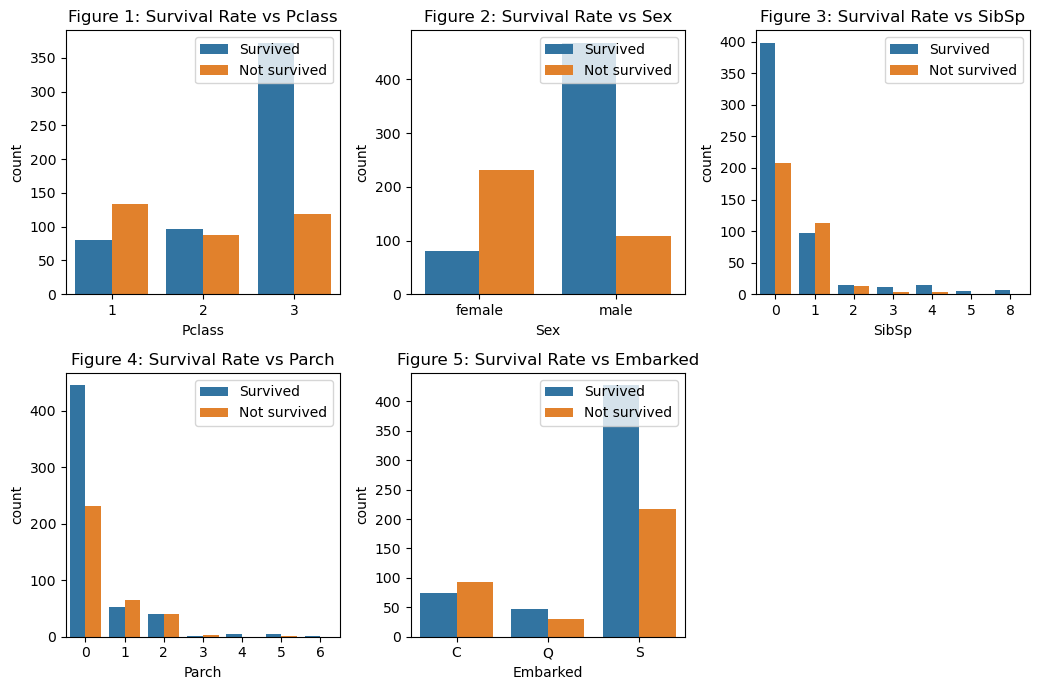

In [26]:
cols = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
# set number row and column
n_rows = 2
n_cols = 3
# crate canvas
fig, ax  = plt.subplots(n_rows, n_cols, figsize= (n_cols * 3.5, n_rows * 3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index cols
        if i < len(cols): # i < 5, vì cols chỉ có 4
            ax_i = ax[r,c]
            sns.countplot(data=titanic_train, x = cols[i], hue = "Survived", ax = ax_i)
            ax_i.set_title(f"Figure {i + 1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title= "", loc= "upper right", labels = {"Not survived", "Survived"})
ax.flat[-1].set_visible(False) # flat chọn plot cuối (-1) và set_visible ẩn ô đó.
plt.tight_layout() # căn lề, khoảng cách giữa các subplot


**Nhận xét:**
- Đối với PClas:
    - Các hành khách hạng vé 1 sẽ có tỷ lệ sống sót cao hơn các hạng vé còn lại, nguyên nhân là họ sẽ được ưu tiên sống sót khi có sự cố trên thuyền.
    - Giới tính đã được phân tích bên trên, và giới tính nữ tỷ lệ sống cao hơn.
    - SibSp (đi theo anh chị em hoặc vợ chồng) và Parch (đi theo con cái hoặc ba mẹ) thì tỷ lệ sống sót giảm dần khi số lượng đi chung cao. Điều đấy cho thấy khách hàng đi một mình (tức không đi chung với ai) sẽ tỷ lệ sống cao hơn. 
    - Đa số hành khách đều ở cảng S và tỷ lệ sống của các hành khách này sẽ tỷ lệ sống sót cao hơn so với cảng C và Q

### 3.2 EDA for Numerical Features

In [27]:
# age, fare 

<Axes: xlabel='Age', ylabel='Count'>

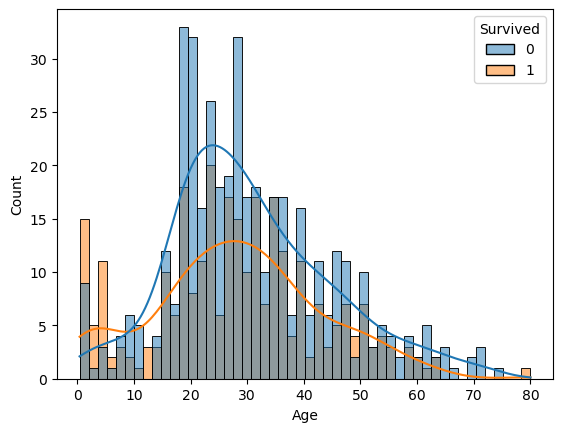

In [28]:
sns.histplot(data= titanic_train, x="Age", hue="Survived", bins= 50, kde= True) #kde (kernel density estimate) vẽ line mật độ

**Nhận xét:**
- Dựa vào miền dữ liệu trên, độ tuổi tập trung khoảng $[19-38]$ và tỷ lệ sống sót cũng tập trung trong khoảng đó.
- Về phía bên trái, độ tuổi khoảng $[0-10]$ sẽ tỷ lệ sống cao nhất do với tiêu chí "Người già và trẻ nhỏ" sẽ được ưu tiên trước.

<Axes: xlabel='Fare', ylabel='Count'>

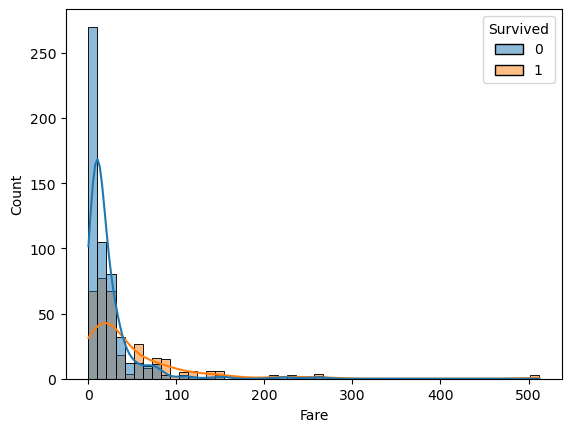

In [29]:
sns.histplot(data= titanic_train, x="Fare", hue="Survived", bins= 50, kde= True) #kde (kernel density estimate) vẽ line mật độ

**Nhận xét:**
- Trong sơ đồ này, nhìn chung thì số lượng khách hàng mua với mức phí $< 50$ chiếm ưu thế vì đơn giản mức phí này phù hợp với đa số mọi người.
- Tuy nhiên, với biểu đồ này rất khó để mô tả chi tiết được, cần chia các khoảng để dễ dàng nhận ra tỷ lệ sống sót.

<Axes: xlabel='Fare', ylabel='count'>

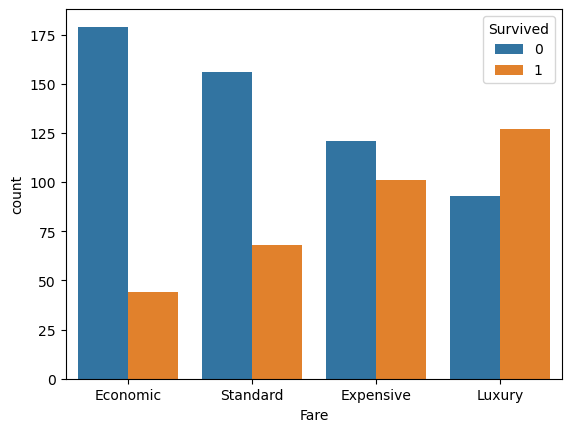

In [30]:
# 0-25%, quartile, 20-50%, 50-75%, 75-100%
fare_name = ["Economic", "Standard", "Expensive", "Luxury"]
quartile_fare = pd.qcut(titanic_train["Fare"], 4, labels=fare_name)
sns.countplot(x= quartile_fare, hue= titanic_train["Survived"])

**Nhận xét:**
- Như đã đề cập về khách hàng có hạng vé càng cao thì với Fare (phí) thì với giá vé càng cao tương đương với hạng vé cao thì tỷ lệ sống sót sẽ cao hơn.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

In [32]:
df = sns.load_dataset("titanic")

# 2) Lựa chọn các cột đặc trưng đơn giản để minh họa (có thể mở rộng sau)
#    Ở đây chọn: pclass, sex, age, sibsp, parch, fare, embarked
cols = ["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
df = df[cols + ["survived"]].copy()

# 3) Xử lý giá trị thiếu
#    - age: điền median
#    - embarked: điền mode
#    - fare: điền median (nếu có)
imputer_median = SimpleImputer(strategy="median")
df["age"] = imputer_median.fit_transform(df[["age"]])
df["fare"] = imputer_median.fit_transform(df[["fare"]])

# Điền giá trị thường gặp cho embarked
if df["embarked"].isnull().any():
    mode_emb = df["embarked"].mode().iloc[0]
    df["embarked"] = df["embarked"].fillna(mode_emb)

# 4) Mã hóa biến phân loại
#    - sex: map trực tiếp male->1, female->0 (đơn giản và minh bạch)
#    - embarked: one-hot encoding (drop_first để tránh đa cộng tuyến)
df["sex"] = df["sex"].map({"male": 1, "female": 0})

# Nếu vẫn còn giá trị thiếu hoặc kiểu dữ liệu không hợp lệ, kiểm tra:
# df = df.dropna(subset=["sex", "embarked"])  # không cần thiết sau điền ở trên

# One-hot cho embarked
df = pd.get_dummies(df, columns=["embarked"], drop_first=True)

# 5) Định nghĩa X và y
X = df.drop(columns=["survived"]).copy()
y = df["survived"].astype(int).copy()

# 6) (Tùy chọn) kiểm tra nhanh kích thước và vài dòng đầu
print("Kích thước dữ liệu:", df.shape)
print("Các cột sử dụng làm X:", list(X.columns))
print("Số lượng lớp trong y:", y.value_counts().to_dict())
display(df.head())

Kích thước dữ liệu: (891, 9)
Các cột sử dụng làm X: ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked_Q', 'embarked_S']
Số lượng lớp trong y: {0: 549, 1: 342}


,pclass,sex,age,sibsp,parch,fare,survived,embarked_Q,embarked_S
0,3,1,22.0,1,0,7.2500,0,False,True
1,1,0,38.0,1,0,71.2833,1,False,False
2,3,0,26.0,0,0,7.9250,1,False,True
3,1,0,35.0,1,0,53.1000,1,False,True
4,3,1,35.0,0,0,8.0500,0,False,True


In [37]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Huấn luyện mô hình Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [39]:
# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Tính các chỉ số đánh giá
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=False)

print("Độ chính xác (Accuracy):", round(accuracy, 4))
print("\nMa trận nhầm lẫn (Confusion Matrix):\n", conf_matrix)
print("\nBáo cáo phân loại (Classification Report):\n", report)

Độ chính xác (Accuracy): 0.7877

Ma trận nhầm lẫn (Confusion Matrix):
 [[86 19]
 [19 55]]

Báo cáo phân loại (Classification Report):
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

